<a href="https://colab.research.google.com/github/adeshsingh5505/BoilerEfficiency/blob/main/xgbOOst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

df = pd.read_csv('/content/data.csv')
df.info()
target_variable = 'TE_8332A.AV_0#'

df = df.drop(columns = ['date'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)

target_column = df[target_variable].values
window_size = 30
X_seq, X_lag, y = [], [], []

for i in range(window_size, len(scaled_data)):
    window = scaled_data[i - window_size:i]
    flat_window = window.flatten()
    X_seq.append(window)
    X_lag.append(flat_window)
    y.append(target_column[i])
X_seq = np.array(X_seq)
X_lag = np.array(X_lag)
y = np.array(y)
X_seq_train, X_seq_test, X_lag_train, X_lag_test, y_train, y_test = train_test_split(
    X_seq, X_lag, y, test_size=0.2, shuffle=False)
model_xgb = XGBRegressor(n_estimators=100)
model_xgb.fit(X_lag_train, y_train)

In [ ]:
pred_xgb = model_xgb.predict(X_lag_test)

print('MAE of XGboost: ', mean_absolute_error(y_test,pred_xgb))
print('R2 of XGboost: ', r2_score(y_test,pred_xgb))

In [ ]:
# Predict
y_pred = model_xgb.predict(X_lag_test)

# Absolute and percentage errors
absolute_error = np.abs(y_pred - y_test)
percentage_error = np.where(y_test != 0, (absolute_error / np.abs(y_test)) * 100, 0)

# Create DataFrame of results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Absolute Error': absolute_error,
    'Percentage Error (%)': percentage_error
})

# Display first 10 predictions
print(results_df.head(10))

# Display min and max percentage error
max_err = np.max(percentage_error)
min_err = np.min(percentage_error)

print(f"\nMaximum Error Percentage: {max_err:.2f}%")
print(f"Minimum Error Percentage: {min_err:.2f}%")


In [ ]:
abs_error = np.abs(pred_xgb - y_test)
error_percent = (abs_error / np.abs(y_test)) * 100
mean_error_percent = np.mean(error_percent)
print(f"Mean Error Percentage: {mean_error_percent:.2f}%")

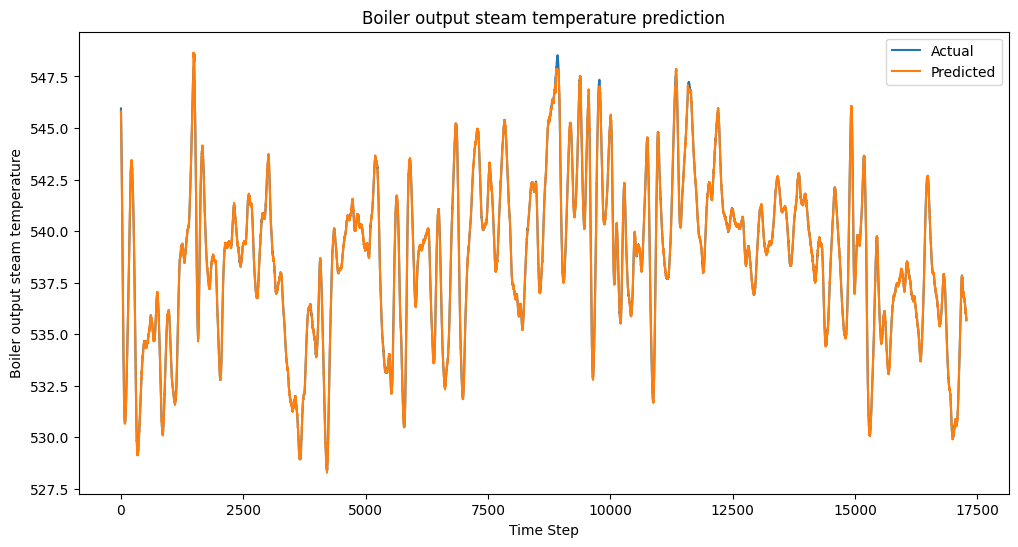

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(pred_xgb, label="Predicted")
plt.title("Boiler output steam temperature prediction")
plt.xlabel("Time Step")
plt.ylabel("Boiler output steam temperature")
plt.legend()
plt.show()